In [5]:
% matplotlib notebook
#% matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from IPython.display import display
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [6]:
import csv
tmp_file = "data/perf_828.csv"
with open(tmp_file) as fin, open("data/hasal.csv", 'w') as fout:
    o = csv.writer(fout)
    o.writerow(['suite_name', '_', 'browser_type', 'machine_platform', 'date', 'time', 'value'])
    for line in fin:
        o.writerow(line.split())
#os.remove(tmp_file)
perf = pd.read_csv("data/hasal.csv")

In [7]:
date, date_int = np.unique(perf.date, return_inverse=True)
case, case_int = np.unique(perf.suite_name, return_inverse=True)
app = list()
for each_case in case:
    app.append(each_case.split('_')[0])
app, app_int = np.unique(app, return_inverse=True)

In [8]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between',
    width='40%'
)

def plot_fig(title, x, y):
    plt.clf()
    plt.title(title)
    plt.scatter(x, y)
    plt.show()

def initial_plot(case):
    target_value = perf.loc[perf['suite_name'] == case, 'value']
    target_date, target_date_int = np.unique(perf.loc[perf['suite_name'] == case, 'date'], return_inverse=True)
    plot_fig(case, target_date_int, target_value)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        target_case = change['new']
        target_value = perf.loc[perf['suite_name'] == target_case, 'value']
        target_date, target_date_int = np.unique(perf.loc[perf['suite_name'] == target_case, 'date'], return_inverse=True)
        plot_fig(target_case, target_date_int, target_value)

selected_case = Dropdown(options=list(case))
selected_case.observe(on_change)
Case = Box([Label(value='Case'), selected_case], layout=form_item_layout)

A Jupyter Widget

<IPython.core.display.Javascript object>


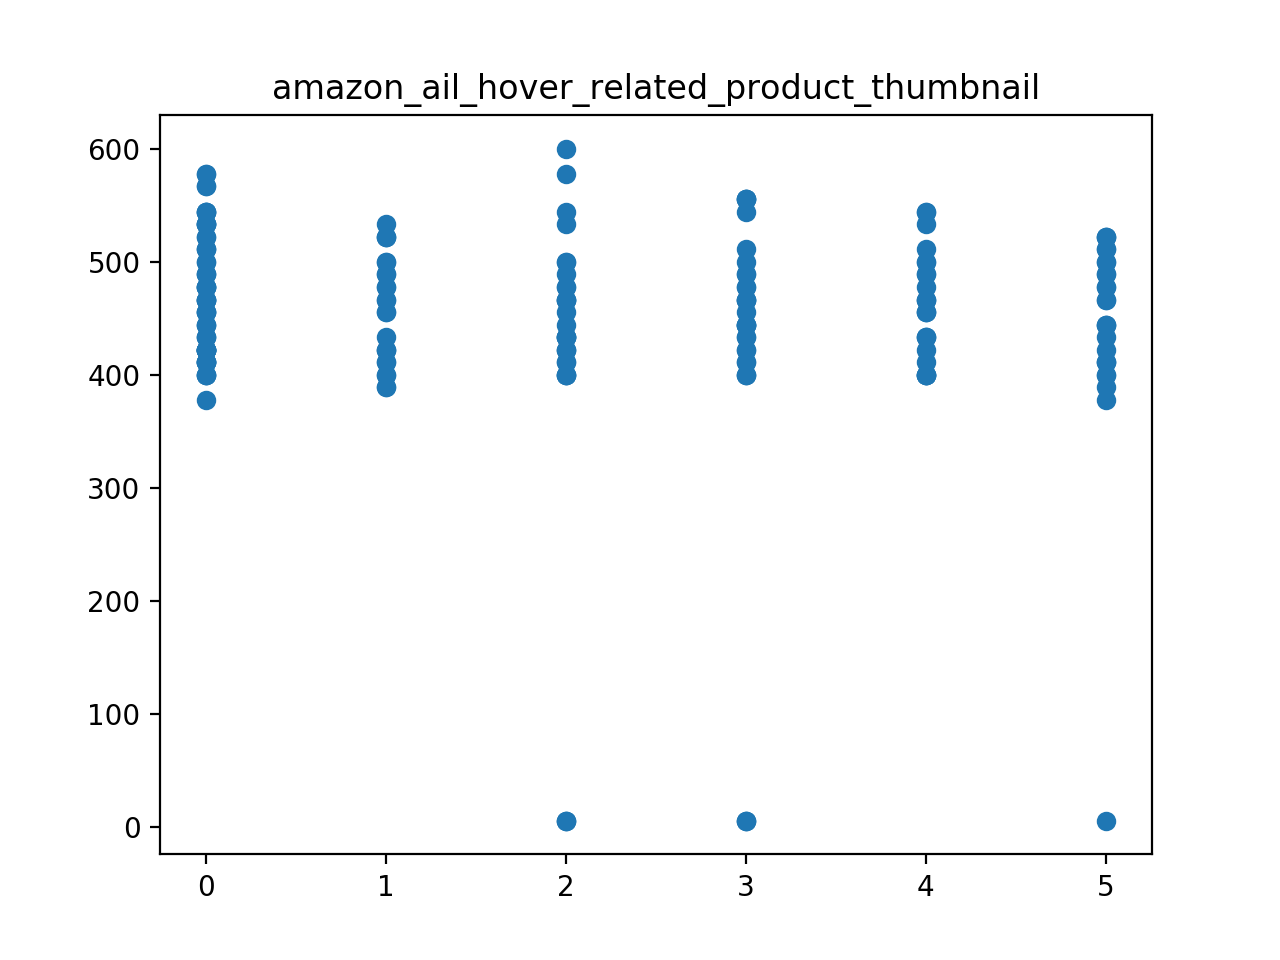

In [9]:
display(Case)
initial_plot(selected_case.value)